# Recherches de Vinciane : accidents et compteurs

In [22]:
# for data
import numpy as np
import pandas as pd


#for plotting
import matplotlib.pyplot as plt
import descartes

## for geospatial
import geopandas as gpd
import folium

#for machine learning 
from sklearn import preprocessing, cluster
import scipy

## for deep learning
#import minisom

A titre informatif : les départements d'idf
Paris (75)
Seine-et-Marne (77)
Yvelines (78)
Essonne (91)
Hauts-de-Seine (92)
Seine-Saint-Denis (93)
Val-de-Marne (94)
Val-d'Oise (95)

## Des données sur les communes

In [23]:
import requests
import tempfile
import zipfile

temporary_location = tempfile.gettempdir()

#Méthodes utilisées dans le TP de géopandas
def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
  myfile = requests.get(url)
  open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
  with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
      zip_ref.extractall(dirname + '/' + destname)

download_unzip('https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12')
communes_borders = gpd.read_file(temporary_location + "/borders/communes-20190101.json")

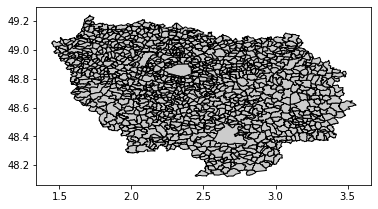

In [24]:
#On indexe par rapport au numéro des départements et on ne garde que les départements d'ile de France qui nous intéressent
data_borders = communes_borders.set_index('insee')
data_borders['dep'] = data_borders.index.str[:2]
communes_idf = data_borders.loc[data_borders['dep'].isin(['75','77', '78', '91','92','93','94', '95'])]
communes_idf.plot(color='0.8', edgecolor='black')

## Les données sur les accidents de vélo

Le site d'où sont tirées les données : https://www.data.gouv.fr/fr/datasets/accidents-de-velo/

In [25]:
accident_velo = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/3d5f2317-5afd-4a9f-a9c5-bd4fe0113f39')
accident_velo_idf = accident_velo[accident_velo['departement'].isin(['75','77','78','91','92','93','94','95'])]
accident_velo_idf
# Il y a un problème avec les latitudes et les longitudes nulles et les quelques erreurs

C:\Users\Vinciane\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5,6,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


identifiant accident        date           mois        jour  heure  \
58             200500001606  2005-01-13   01 - janvier   3 - jeudi   11.0   
61             200500001930  2005-01-15   01 - janvier  5 - samedi   15.0   
221            200500004591  2005-01-04   01 - janvier   1 - mardi   17.0   
222            200500004597  2005-01-03   01 - janvier   0 - lundi    9.0   
223            200500004600  2005-01-03   01 - janvier   0 - lundi   17.0   
...                     ...         ...            ...         ...    ...   
65531          201800050291  2018-07-10   07 - juillet   1 - mardi    9.0   
65532          201800050337  2018-11-17  11 - novembre  5 - samedi   12.0   
65533          201800050355  2018-02-01   02 - février   3 - jeudi   15.0   
65534          201800050359  2018-02-12   02 - février   0 - lundi    9.0   
65535          201800050370  2018-05-28       05 - mai   0 - lundi   19.0   

      departement commune       lat      lon en agglomeration  ...  \
58             78   78230   0.00000  0.00000              oui  ...   
61             95   95042  49.06400  2.32800              non  ...   
221            75   75001   0.00000  0.00000              oui  ...   
222            75   75005   0.00000  0.00000              oui  ...   
223            75   75019   0.00000  0.00000              oui  ...   
...           ...     ...       ...      ...              ...  ...   
65531          75   75101  48.86400  2.33134              oui  ...   
65532          75   75101  48.85854  2.34825              oui  ...   
65533          75   75102  48.86870  2.34133              oui  ...   
65534          75   75101  48.86470  2.34275              oui  ...   
65535          75   75102  48.86820  2.34361              oui  ...   

      existence securite    usage securite              obstacle fixe heurte  \
58                   NaN               NaN                               NaN   
61                   NaN               NaN                               NaN   
221               Casque               Oui                               NaN   
222                  NaN               NaN                               NaN   
223                  NaN               NaN                               NaN   
...                  ...               ...                               ...   
65531             Casque               Non  Autre obstacle fixe sur chaussée   
65532             Casque  Non déterminable                               NaN   
65533             Casque               Oui                               NaN   
65534             Casque               Oui                               NaN   
65535             Casque  Non déterminable                               NaN   

      obstacle mobile heurte localisation choc  \
58                  Véhicule             Avant   
61                       NaN           Arrière   
221                 Véhicule             Avant   
222                 Véhicule           Arrière   
223                   Piéton             Avant   
...                      ...               ...   
65531               Véhicule       Avant droit   
65532               Véhicule       Côté gauche   
65533               Véhicule             Avant   
65534               Véhicule      Avant gauche   
65535               Véhicule             Avant   

                     manoeuvre avant accident  identifiant vehicule  \
58               Sans changement de direction       200500001606B02   
61               Sans changement de direction       200500001930B02   
221              Sans changement de direction       200500004591B01   
222                         Tournant à gauche       200500004597A01   
223              Sans changement de direction       200500004600A01   
...                                       ...                   ...   
65531            Sans changement de direction       201800050291B01   
65532            Sans changement de direction       201800050337A01   
65533  Dans le couloir bus, dans le même

In [26]:
#On ne garde que les colonnes qui nous intéressent: 
accident_velo_idf = accident_velo_idf[['identifiant accident','lat','lon','gravite accident']]
accident_velo_idf.isnull().sum() # On remarque qu'il n'y a pas de valeur manquante
#Quelques latitudes et longitudes aberrantes demeurent, alors on tente de les éliminer

identifiant accident    0
lat                     0
lon                     0
gravite accident        0
dtype: int64

Pour les valeurs des longitudes et latitudes, j'ai cherché sur maps les latitudes et longitudes max d'ile de France.. 
On obtient

longitude min = 1,44 longitude max = 3,57
latitude min = 48.12 , latitude max= 49.2

In [27]:
#On transforme les coordonnées latitudes/longitudes en coordonnées lisibles par géopandas
gdf = gpd.GeoDataFrame(accident_velo_idf, geometry=gpd.points_from_xy(accident_velo_idf.lon, accident_velo_idf.lat))
#On enlève les valeurs aberrantes de latitude et longitude situés hors Ile-de-France 
gdf = gdf.cx[1.44:3.57,48.12:49.2]
gdf  #On remarque qu'il nous reste 3400 données, ce qu'on supponse représentatif des 18 000 données 

identifiant accident       lat      lon        gravite accident  \
61             200500001930  49.06400  2.32800             0 - Indemne   
1142           200500024289  48.69700  1.77100        1 - Blessé léger   
1143           200500024300  48.85000  1.89000        1 - Blessé léger   
1149           200500024520  48.57500  2.16600  2 - Blessé hospitalisé   
1152           200500024639  48.73000  2.10000        1 - Blessé léger   
...                     ...       ...      ...                     ...   
65531          201800050291  48.86400  2.33134  2 - Blessé hospitalisé   
65532          201800050337  48.85854  2.34825        1 - Blessé léger   
65533          201800050355  48.86870  2.34133        1 - Blessé léger   
65534          201800050359  48.86470  2.34275        1 - Blessé léger   
65535          201800050370  48.86820  2.34361        1 - Blessé léger   

                       geometry  
61     POINT (2.32800 49.06400)  
1142   POINT (1.77100 48.69700)  
1143   POINT (1.89000 48.85000)  
1149   POINT (2.16600 48.57500)  
1152   POINT (2.10000 48.73000)  
...                         ...  
65531  POINT (2.33134 48.86400)  
65532  POINT (2.34825 48.85854)  
65533  POINT (2.34133 48.86870)  
65534  POINT (2.34275 48.86470)  
65535  POINT (2.34361 48.86820)  

[3462 rows x 5 columns]

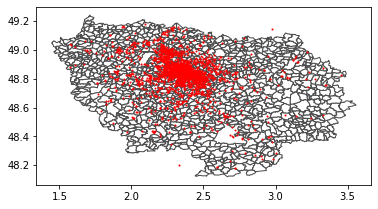

In [28]:
#Première carte, pas ouf
fig, ax = plt.subplots()
communes_idf.plot(ax=ax, color='white', edgecolor='0.3')
gdf.plot(ax=ax, color='red', markersize=1)
plt.show()

## Travail sur la gravité des accidents

In [29]:
gdf.dtypes
gdf['gravite accident']

61                  0 - Indemne
1142           1 - Blessé léger
1143           1 - Blessé léger
1149     2 - Blessé hospitalisé
1152           1 - Blessé léger
                  ...          
65531    2 - Blessé hospitalisé
65532          1 - Blessé léger
65533          1 - Blessé léger
65534          1 - Blessé léger
65535          1 - Blessé léger
Name: gravite accident, Length: 3462, dtype: object

In [30]:
gdf.groupby(['gravite accident']).count()
# A améliorer

identifiant accident   lat   lon  geometry
gravite accident                                                  
0 - Indemne                              351   351   351       351
1 - Blessé léger                        2365  2365  2365      2365
2 - Blessé hospitalisé                   684   684   684       684
3 - Tué                                   62    62    62        62

In [31]:
#Au final ce n'est pas utile car python croit que le 0 est une erreur
gdf['grav_acc'] = gdf['gravite accident'].str[:2] 
# On conserve uniquement le chiffre qui décrit l'accident

Si on essaye de passer par géopandas
accident_velo2 = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/edef9d7e-d574-4203-b4ce-40328edb8298')

## Faire une carte interactive sur les accidents

In [12]:
from folium.plugins import MarkerCluster

In [13]:
indemne = gdf[gdf['gravite accident']  == '0 - Indemne'][['lat', 'lon']]
blesse_leg = gdf[gdf['gravite accident']  == '1 - Blessé léger'][['lat', 'lon']]
blesse_hosp = gdf[gdf['gravite accident']  == '2 - Blessé hospitalisé'][['lat', 'lon']]
tue =gdf[gdf['gravite accident']  == '3 - Tué'][['lat', 'lon']]

In [69]:
# Carte différenciant la gravité des accidents
Paris = [48.85, 2.34]
map_accident = folium.Map(location = Paris , zoom_start=10)

lat = indemne.lat
lng = indemne.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='white', icon_color='black', icon='bicycle', prefix='fa')).add_to(map_accident)
lat = blesse_leg.lat
lng = blesse_leg.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='beige', icon_color='black', icon='bicycle', prefix='fa')).add_to(map_accident)
lat = blesse_hosp.lat
lng = blesse_hosp.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='lightred', icon_color='black', icon='bicycle', prefix='fa')).add_to(map_accident)
lat = tue.lat
lng = tue.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='red', icon_color='black', icon='bicycle', prefix='fa')).add_to(map_accident)

map_accident

In [15]:
#Deuxième carte : des clusters sont faits automatiquement par secteur ou les points sont proches
Paris = [48.85, 2.34]
map_accident = folium.Map(location = Paris , zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_accident)

lat = gdf.lat
lng = gdf.lon
for lat, lng in zip(lat, lng):
    folium.Marker(location=[lat,lng],
    icon = folium.Icon(color='red', icon_color='black', icon='bicycle', prefix='fa'),
    ).add_to(marker_cluster)
    
map_accident

Idée pour améliorer : 

-différencier les accidents "légers" et les accidents "graves", avec des nuances de points, pour vraiment localiser les endroits à risque
Le but de la localisation des accidents : prévenir les usagers qu'ils passent par une zone à risque. 
Dnas les prolongements, on pourrait créer un mode "safe" pour ceux qui veulent faire du vélo avec leurs enfants.

en gros, je voudrais situer tous les endroits ou y a eu une collision : tous les points qui sotn des clusters à l'échelle 0

## Pour prolonger avec autant de clusters d'accidents que je souhaite : 

Aller voir sur le site : https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1
autre site : https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/
autre site utile : https://medium.com/datadriveninvestor/weighted-k-means-clustering-of-gps-coordinates-python-7c6270846163

In [16]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()

In [17]:
#k means correspond au nombre optimal de clusters, que nous ne connaissons pas encore, je dirais 250 moi

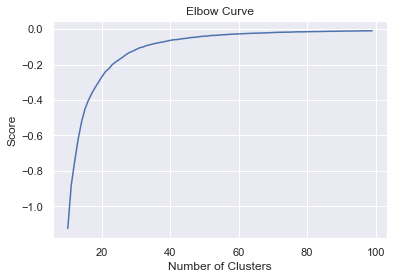

In [18]:
K_clusters = range(10,100)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = gdf[['lat']]
X_axis = gdf[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [30]:
#on définit pour la suite le nombre de clusters qu'on souhaite
k =30

In [31]:
X=gdf.loc[:,['identifiant accident','lat','lon']]

In [32]:
kmeans = KMeans(n_clusters = k, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.sort_values(by = 'lat').head(10)

identifiant accident       lat      lon  cluster_label
52055          201500034057  48.18055  2.72113              4
52054          201500034057  48.18055  2.72113              4
16275          200800007009  48.19000  2.59200             26
16276          200800007009  48.19000  2.59200             26
62005          201700040745  48.20000  2.33000             26
49800          201500009244  48.23190  2.68456              4
13046          200700041214  48.24400  2.90300              4
45061          201400009446  48.24400  2.98100              4
63789          201800004823  48.26309  2.90225              4
8551           200600052493  48.27400  2.86100              4

Text(0, 0.5, 'longitude')

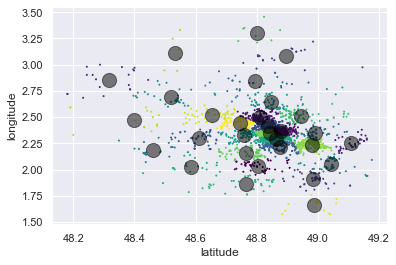

In [33]:
plt.scatter(x = X.lat, y = X.lon, s=1, c=labels,cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], s=200, alpha =0.5, c='black')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [64]:
model = cluster.AffinityPropagation()
k = X["cluster_label"].nunique()

Text(0.5, 1.0, 'Clustering (k=75)')

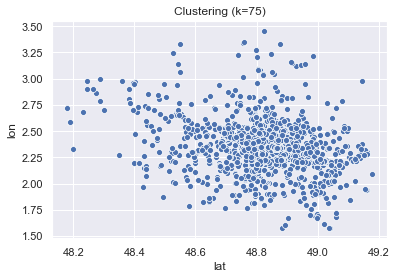

In [65]:
sns.scatterplot(x= X.lat, y=X.lon, 
                palette=sns.color_palette("bright", k),
                legend="brief").set_title('Clustering (k='+str(k)+')')

In [37]:
X = X[['identifiant accident','cluster_label']]
X.head(5)

identifiant accident  cluster_label
61            200500001930             45
1142          200500024289             58
1143          200500024300             40
1149          200500024520             53
1152          200500024639             48

In [38]:
clustered_data = gdf.merge(X, left_on='identifiant accident', right_on='identifiant accident')
clustered_data.head(5)

identifiant accident        date          mois          jour  heure  \
0          200500001930  2005-01-15  01 - janvier    5 - samedi   15.0   
1          200500024289  2005-04-10    04 - avril  6 - dimanche    9.0   
2          200500024300  2005-04-24    04 - avril  6 - dimanche   18.0   
3          200500024520  2005-04-03    04 - avril  6 - dimanche   12.0   
4          200500024639  2005-04-05    04 - avril     1 - mardi   11.0   

  departement commune     lat    lon en agglomeration  ...  \
0          95   95042  49.064  2.328              non  ...   
1          78   78497  48.697  1.771              non  ...   
2          78   78062  48.850  1.890              oui  ...   
3          91   91105  48.575  2.166              oui  ...   
4          78   78143  48.730  2.100              oui  ...   

  obstacle fixe heurte obstacle mobile heurte localisation choc  \
0                  NaN                    NaN           Arrière   
1                  NaN               Véhicule             Avant   
2                  NaN               Véhicule             Avant   
3                  NaN                    NaN               NaN   
4                  NaN               Véhicule       Avant droit   

       manoeuvre avant accident identifiant vehicule type autres vehicules  \
0  Sans changement de direction      200500001930B02    Cyclomoteur <50cm3   
1              Déporté à gauche      200500024289A01                   NaN   
2  Sans changement de direction      200500024300B02               VL seul   
3          Même sens, même file      200500024520B02               VL seul   
4  Sans changement de direction      200500024639B02               VL seul   

   manoeuvre autres vehicules nombre autres vehicules  \
0        Même sens, même file                     1.0   
1                         NaN                     NaN   
2           Tournant à gauche                     1.0   
3        Même sens, même file                     1.0   
4      Traversant la chaussée                     1.0   

                   geometry  cluster_label  
0  POINT (2.32800 49.06400)             45  
1  POINT (1.77100 48.69700)             58  
2  POINT (1.89000 48.85000)             40  
3  POINT (2.16600 48.57500)             53  
4  POINT (2.10000 48.73000)             48  

[5 rows x 41 columns]

## Cluestering méthode dbscan

In [32]:
X=gdf.loc[:,['lat','lon']]
#X
#gdf
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

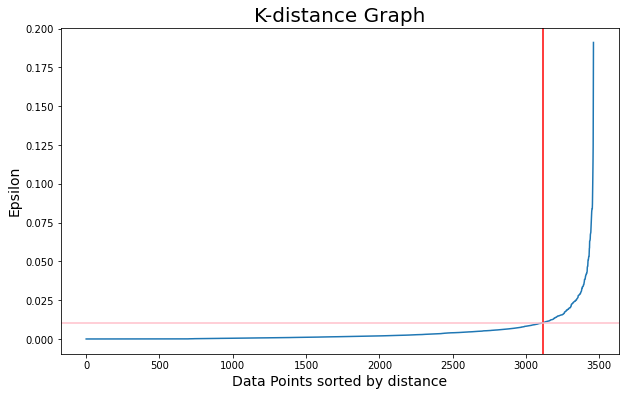

In [33]:
neigh = NearestNeighbors(n_neighbors=2) # à vérifier
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1] # On fit avec le training set donc le plus proche voisin est lui-même
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.axvline(x=(0.9)*3462, c ='red')
plt.axhline(y=0.01, c= 'pink')
plt.show()
#Comme nous l’avons vu précédemment nous allons choisir un ε de tel sorte que 90% des observations aient une distance au proche voisin inférieure à ε. 
#je fais 0.9*3600 données = 3200, on voit pour 3200 epsilon environ = 0.01
#A préciser avec un affichage! pas easy à faire
#Attention, est ce qu'il faut faire un truc pour expirmer l'epsilon en mètres?

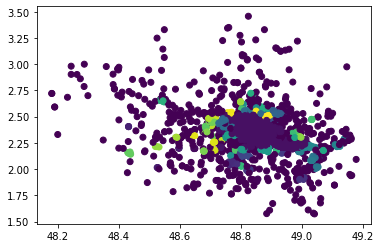

In [44]:
from sklearn.cluster import DBSCAN
db2 = DBSCAN(eps = 0.01, min_samples=3).fit_predict(X)
plt.scatter(gdf['lat'],gdf['lon'],c = db2);

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


186


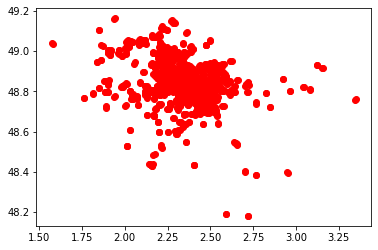

In [35]:
gdf5 = gdf.as_matrix(columns=['lat','lon']) 
dbsc = (DBSCAN(eps=0.01, min_samples=2).fit(gdf5)) 
gdf5_labels = dbsc.labels_ 
num_clusters = len(set(dbsc.labels_)) 
print(num_clusters)
dbsc_clusters = pd.Series([gdf[gdf5_labels==i] for i in range(num_clusters)]) 
gdf['gdf5_labelse'] = gdf5_labels
gdf_filtered = gdf[gdf5_labels>-1]
plt.scatter(gdf_filtered['lon'], gdf_filtered['lat'],  c= 'red') 
#La j'ai uniquement les points qui sont dans des clusters accidentés
#Pour l'améliorer, il faudrait garder uniquement le centre des points 

In [51]:
#centre cluster
def get_centroid(cluster): 
    cluster_ary = np.asarray(cluster) 
    centroid = cluster_ary.mean(axis=0) 
    return centroid 

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice.
  after removing the cwd from sys.path.
C:\Users\Vinciane\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


0                               [48.816, 1.851]
1       [48.79600000000001, 1.8840000000000001]
2      [48.648999999999994, 2.1959999999999997]
3                [48.77077, 2.4647200000000002]
4      [48.721000000000004, 2.8489999999999998]
                         ...                   
288              [48.98214, 1.9163599999999998]
289               [48.784890000000004, 2.30974]
290                          [48.9131, 2.28432]
291                           [48.8877, 2.2531]
292                                  [nan, nan]
Length: 293, dtype: object
293


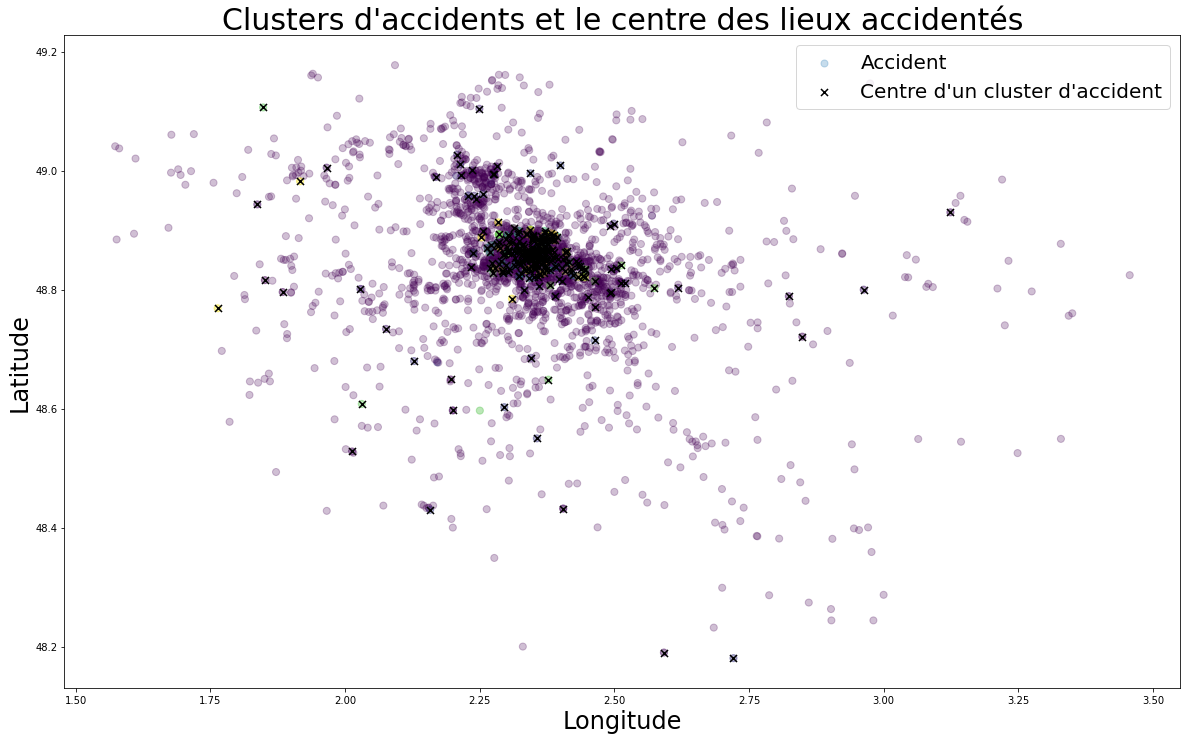

In [82]:
#travail en cours sur le centre du cluster

epsilon = 0.001/kms_per_rad
# On a  1=1km, 0.1=100m  0.01 = 10m
#Cela ne correspond pas au bon epsilon plus haut, mais donne un résultat plus cohérent
epsilon
gdf5 = gdf.as_matrix(columns=['lat','lon']) 
dbsc = (DBSCAN(eps=epsilon, min_samples=2).fit(gdf5)) 


gdf51_labels = dbsc.labels_ 
dbsc_clusters = pd.Series([gdf5[gdf51_labels==n] for n in range(num_clusters)]) 
cluster_centroids = dbsc_clusters.map(get_centroid) 
print(cluster_centroids)

gdf['gdf5_labelse'] = gdf5_labels
gdf_filtered = gdf[gdf5_labels>-1]
num_clusters = len(set(dbsc.labels_)) 
print(num_clusters)


cent_lat, cent_lon = zip(*cluster_centroids)
centroids_df = pd.DataFrame({'lon':cent_lon, 'lat':cent_lat}) 

#On affiche ce qu'on souhaite : 
fig, ax = plt.subplots(figsize=[20, 12]) 
accident_scatter = ax.scatter(gdf['lon'], gdf['lat'],  c=gdf5_labels, alpha=0.25, s=50) 
centroid_scatter = ax.scatter(centroids_df['lon'], centroids_df['lat'],marker='x', linewidths=2, c='k', s=50) 
ax.set_title("Clusters d'accidents et le centre des lieux accidentés", fontsize = 30) 
ax.set_xlabel('Longitude', fontsize=24) 
ax.set_ylabel('Latitude', fontsize = 24) 
ax.legend([accident_scatter, centroid_scatter], ['Accident', "Centre d'un cluster d'accident"], loc='upper right', fontsize = 20) 
plt.show()
#Finalement, ce n'est pas ce qu'on cherchait, on voit le pb à Paris : dès qu'ils sont peu éloignés, ils se regroupent, 
#ca fait comme si tous ls accidents de paris étaient au même endroit...

C:\Users\Vinciane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Le nombre de points dans des clusters est de 306


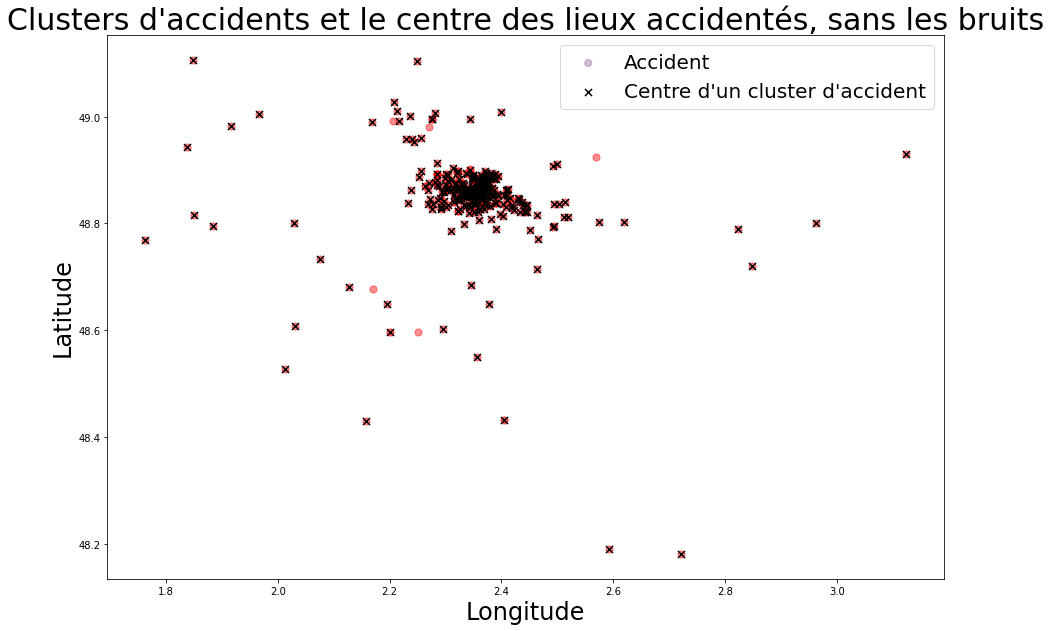

In [68]:

gdf5 = gdf.as_matrix(columns=['lat','lon']) 
dbsc = (DBSCAN(eps=0.0001, min_samples=2).fit(gdf5)) 
gdf5_labels = dbsc.labels_ 
num_clusters = len(set(dbsc.labels_)) 
print("Le nombre de points dans des clusters est de", num_clusters)
dbsc_clusters = pd.Series([gdf[gdf5_labels==i] for i in range(num_clusters)]) 
gdf['gdf5_labelse'] = gdf5_labels
gdf_filtered = gdf[gdf5_labels>-1]


fig, ax = plt.subplots(figsize=[15, 10]) 
filtres_scatter = ax.scatter(gdf_filtered['lon'], gdf_filtered['lat'],  c= 'red', alpha =0.25, s=50) 
#accident_scatter = ax.scatter(gdf['lon'], gdf['lat'],  c=gdf5_labels, alpha=0.25, s=50) 
centroid_scatter = ax.scatter(centroids_df['lon'], centroids_df['lat'],marker='x', linewidths=2, c='k', s=50) 
ax.set_title("Clusters d'accidents et le centre des lieux accidentés, sans les bruits", fontsize = 30) 
ax.set_xlabel('Longitude', fontsize=24) 
ax.set_ylabel('Latitude', fontsize = 24) 
ax.legend([accident_scatter, centroid_scatter], ['Accident', "Centre d'un cluster d'accident"], loc='upper right', fontsize = 20) 
plt.show()

In [78]:
#On trouve 15 valeurs manquantes, mais je ne sais pas pourquoi
#Je les enlève
centroids_df = centroids_df.dropna()
#Cela correspondrait aux points dangereux à survaloriser sur la carte

Idée: faire deux cas de DBScan : 

un cas pour les lieux avec beaucoup d'accidents (dans Paris)

et un cas avec des lieux avec en moyenne moins d'accidents, avec un epsilon plus grand
=> comment différencier les densités?

Autre idée : prendre en compte la gravité des accidents

In [79]:
Paris = [48.85, 2.34]
map_centroid = folium.Map(location = Paris , zoom_start=10)

lat = centroids_df.lat
lng = centroids_df.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='red')).add_to(map_centroid)
map_centroid
#Cette carte indique les 291 lieux dangereux pour les vélos

In [75]:
#Analyse plus précise sur les accidents avec des individus tués lors d'accidents de la circulation :
#On peut essayer de voir s'il y a des centres de cluster concernés par les tués, pour rajouter encore plus de poids sur ces carrefour très dangereux
tue =gdf[gdf['gravite accident']  == '3 - Tué'][['lat', 'lon']]
Paris = [48.85, 2.34]
map_centroid_tue = folium.Map(location = Paris , zoom_start=10)

lat = centroids_df.lat
lng = centroids_df.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='white',icon_color='black', icon='bicycle', prefix='fa')).add_to(map_centroid_tue)
lat = tue.lat
lng = tue.lon
for lat, lng in zip(lat, lng):
        folium.Marker(location=[lat,lng],icon = folium.Icon(color='red',icon_color='black', icon='bicycle', prefix='fa')).add_to(map_centroid_tue)

map_centroid_tue
#Ca serait bien de faire un autre type de comparaison, regression linéaire ou autre

## Je peux faire des tests sur des corrélations, pour avoir un peu de visualisation


Je sais pas trop en quoi ca peut nosu être utile à la fin, mais bon, on a qu'à dire que ca serait pour des prolongements de l'application : 

In [91]:
accident_velo_idf = accident_velo[accident_velo['departement'].isin(['75','77','78','91','92','93','94','95'])]
accident_velo_idf
gdf = gpd.GeoDataFrame(accident_velo_idf, geometry=gpd.points_from_xy(accident_velo_idf.lon, accident_velo_idf.lat))
#L but serait de montrer la représentativité de mes 4 000 valeurs par rapport aux 18 000 valeurs
gdf = gdf.cx[1.44:3.57,48.12:49.2]
gdf

identifiant accident        date           mois          jour  heure  \
61             200500001930  2005-01-15   01 - janvier    5 - samedi   15.0   
1142           200500024289  2005-04-10     04 - avril  6 - dimanche    9.0   
1143           200500024300  2005-04-24     04 - avril  6 - dimanche   18.0   
1149           200500024520  2005-04-03     04 - avril  6 - dimanche   12.0   
1152           200500024639  2005-04-05     04 - avril     1 - mardi   11.0   
...                     ...         ...            ...           ...    ...   
65531          201800050291  2018-07-10   07 - juillet     1 - mardi    9.0   
65532          201800050337  2018-11-17  11 - novembre    5 - samedi   12.0   
65533          201800050355  2018-02-01   02 - février     3 - jeudi   15.0   
65534          201800050359  2018-02-12   02 - février     0 - lundi    9.0   
65535          201800050370  2018-05-28       05 - mai     0 - lundi   19.0   

      departement commune       lat      lon en agglomeration  ...  \
61             95   95042  49.06400  2.32800              non  ...   
1142           78   78497  48.69700  1.77100              non  ...   
1143           78   78062  48.85000  1.89000              oui  ...   
1149           91   91105  48.57500  2.16600              oui  ...   
1152           78   78143  48.73000  2.10000              oui  ...   
...           ...     ...       ...      ...              ...  ...   
65531          75   75101  48.86400  2.33134              oui  ...   
65532          75   75101  48.85854  2.34825              oui  ...   
65533          75   75102  48.86870  2.34133              oui  ...   
65534          75   75101  48.86470  2.34275              oui  ...   
65535          75   75102  48.86820  2.34361              oui  ...   

         usage securite              obstacle fixe heurte  \
61                  NaN                               NaN   
1142                NaN                               NaN   
1143                Oui                               NaN   
1149                Oui                               NaN   
1152                NaN                               NaN   
...                 ...                               ...   
65531               Non  Autre obstacle fixe sur chaussée   
65532  Non déterminable                               NaN   
65533               Oui                               NaN   
65534               Oui                               NaN   
65535  Non déterminable                               NaN   

      obstacle mobile heurte localisation choc  \
61                       NaN           Arrière   
1142                Véhicule             Avant   
1143                Véhicule             Avant   
1149                     NaN               NaN   
1152                Véhicule       Avant droit   
...                      ...               ...   
65531               Véhicule       Avant droit   
65532               Véhicule       Côté gauche   
65533               Véhicule             Avant   
65534               Véhicule      Avant gauche   
65535               Véhicule             Avant   

                     manoeuvre avant accident identifiant vehicule  \
61               Sans changement de direction      200500001930B02   
1142                         Déporté à gauche      200500024289A01   
1143             Sans changement de direction      200500024300B02   
1149                     Même sens, même file      200500024520B02   
1152             Sans changement de direction      200500024639B02   
...                                       ...                  ...   
65531            Sans changement de direction      201800050291B01   
65532            Sans changement de direction      201800050337A01   
65533  Dans le couloir bus, dans le même sens      201800050355B01   
65534                  Traversant la chaussée      201800050359B01   
65535            Sans changement de direction      201800050370B01   

                     type autres vehicules

In [92]:
gdf[gdf['commune']== '91377']
#Avec ca je voulais juste vérifier si il n'y avait pas moins de données géographiques que sur le premier site. 
#Résultat : c'est bon, ils ne se servent pas des 15 000 autres données sur leur carte, 
#il n'y a pas d'erreur dans le téléchargement, mais bien lié à l'encodage par les forces de l'ordre

identifiant accident        date            mois          jour  heure  \
56909          201600036872  2016-02-03    02 - février  2 - mercredi   17.0   
56911          201600036893  2016-09-26  09 - septembre     0 - lundi    8.0   
61856          201700038877  2017-03-14       03 - mars     1 - mardi    8.0   
61857          201700038880  2017-04-10      04 - avril     0 - lundi   12.0   
61858          201700038898  2017-07-03    07 - juillet     0 - lundi   17.0   
61859          201700038899  2017-10-10    10 - octobre     1 - mardi   20.0   

      departement commune       lat      lon en agglomeration  ...  \
56909          91   91377  48.73249  2.26590              oui  ...   
56911          91   91377  48.72103  2.30205              non  ...   
61856          91   91377  48.72542  2.26164              oui  ...   
61857          91   91377  48.72766  2.28112              oui  ...   
61858          91   91377  48.73105  2.29058              oui  ...   
61859          91   91377  48.73770  2.27260              oui  ...   

         usage securite obstacle fixe heurte obstacle mobile heurte  \
56909               Oui                  NaN               Véhicule   
56911               Oui                  NaN               Véhicule   
61856               Oui                  NaN               Véhicule   
61857               Oui                  NaN                 Piéton   
61858  Non déterminable                  NaN               Véhicule   
61859  Non déterminable                  NaN               Véhicule   

      localisation choc      manoeuvre avant accident identifiant vehicule  \
56909               NaN  Sans changement de direction      201600036872B01   
56911             Avant        Traversant la chaussée      201600036893B01   
61856           Arrière          Même sens, même file      201700038877B01   
61857             Avant  Sans changement de direction      201700038880A01   
61858             Avant  Sans changement de direction      201700038898B01   
61859             Avant  Sans changement de direction      201700038899B01   

       type autres vehicules    manoeuvre autres vehicules  \
56909                VL seul  Sans changement de direction   
56911                VL seul        Traversant la chaussée   
61856                VL seul  Sans changement de direction   
61857                    NaN                           NaN   
61858                VL seul  Sans changement de direction   
61859                VL seul                 En s’insérant   

      nombre autres vehicules                  geometry  
56909                     1.0  POINT (2.26590 48.73249)  
56911                     1.0  POINT (2.30205 48.72103)  
61856                     1.0  POINT (2.26164 48.72542)  
61857                     NaN  POINT (2.28112 48.72766)  
61858                     1.0  POINT (2.29058 48.73105)  
61859                     1.0  POINT (2.27260 48.73770)  

[6 rows x 40 columns]

### Des données sur les compteurs dans Paris

le fichier à télécharger est ici : https://velo.smartidf.services/donnees, dans comptage vélo - Données compteurs 

lien utile pour choisir la position de départ sur la carte  : https://python-visualization.github.io/folium/quickstart.html
il génère un oblget popu quand on clique à un endroit sur la carte

Pour les compteurs on a des données aussi : https://www.data.gouv.fr/fr/datasets/comptage-velo-historique-donnees-compteurs/